# Trabalho Final para aprovação do curso Sistemas Inteligentes

#### Instruções: 
- Comentem bastante o código, deixe o mais claro possível
- Usem e abusem do Markdown
- Isso ae!

# Pre-Processamento

#### Importação de bibliotecas

In [116]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')


In [117]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

##### Carregando dataset

In [118]:
#Dataset para treinamento
db = pd.read_csv("bank-additional-dataset/bank-additional-full.csv", sep= ";");

##### Informações sobre o dataset

In [119]:
print("Dimensões do dataset", db.shape)

Dimensões do dataset (41188, 21)


In [120]:
print("Features do dataset: ", db.columns)

Features do dataset:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

##### Como podemos observar há 11 features categóricas, é um número significante e teremos que tratá-los num futuro próximo

In [121]:
#tipos de dados para cada feature
db.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [122]:
# print the first 20 rows of data
print(db.head(20))

    age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no   

In [123]:
db.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [124]:
# Contando número de valores nulos no dataset
db.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [125]:
#Visualizando valores unicos do dataset
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())
print()
print("Contact: ",db.contact.unique())
print()
print("Month : ",db.month.unique())
print()
print("Duration: ",db.duration.unique())
print()
print("Campaign: ",db.campaign.unique())
print()
print("Pdays: ",db.pdays.unique())
print()
print("previous: ",db.previous.unique())
print()
print("Poutcome: ",db.poutcome.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']

Contact:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Duration:  [ 261  149  226 ... 1246 1556 1868]

Campaign:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

Pdays:  [999   6   

## Tratamento do dataset por blocos
        - Bank client data
        - Last contact of the current campaign
        - Social and economic context attributes
        - Other attributes:

# 1. Bank Client Data

In [126]:
#Particionando o Dataset para trabalhar apenas com os Client Data
bank_client = db.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [127]:
#Visualizando as amostras 
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']


##### Visualização dos Dados

##### Distribuição de idades

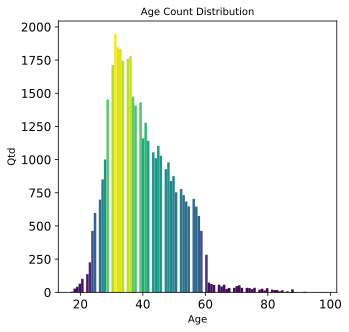

In [142]:
#Deixar Histograma colorido
N, bins, patches = plt.hist(bank_client['age'], bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('Age', fontsize =10)
plt.ylabel('Qtd', fontsize =10)
plt.title('Age Count Distribution', fontsize =10)
#plt.savefig('age_count_distribuition.png', format='png', dpi =800)
plt.show()

###### Distribuição de trabalhos dos clientes

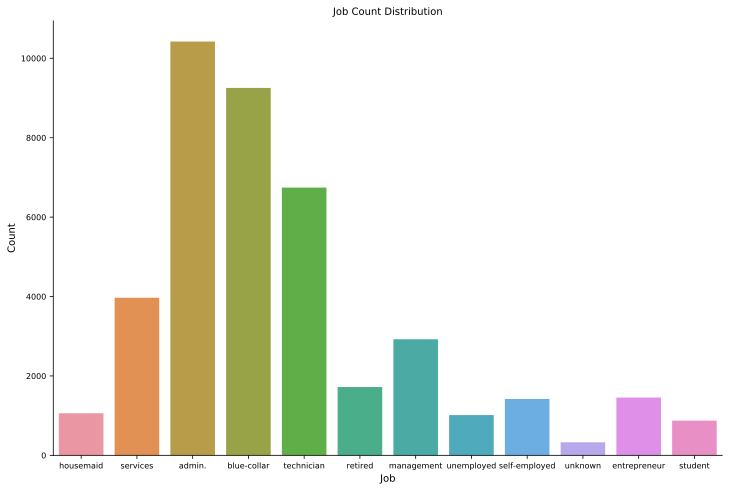

In [157]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Job Count Distribution', fontsize=10)
ax.tick_params(labelsize=8)
sns.despine()
# plt.savefig('job_count_distribuition.png', format='png', dpi =200)

##### Distribuição estado civil

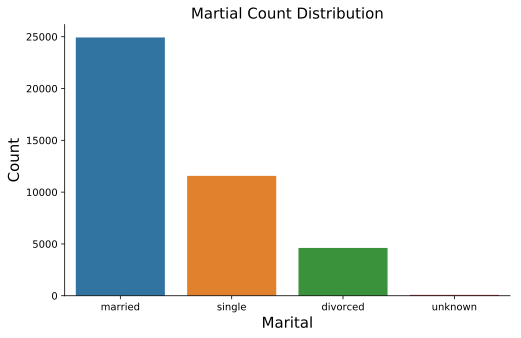

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Martial Count Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()
#plt.savefig('martial_count_distribuition.png', format='png', dpi =300)

##### Distribuição Escolaridade

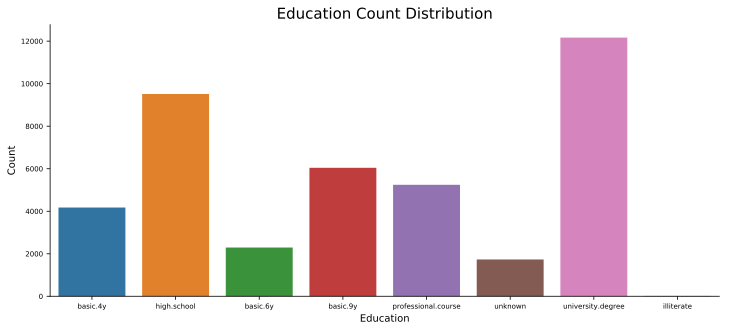

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=7)
sns.despine()
#plt.savefig('education_count_distribuition.png', format='png', dpi =300)

###### Distribuição Housing, Loan e Default

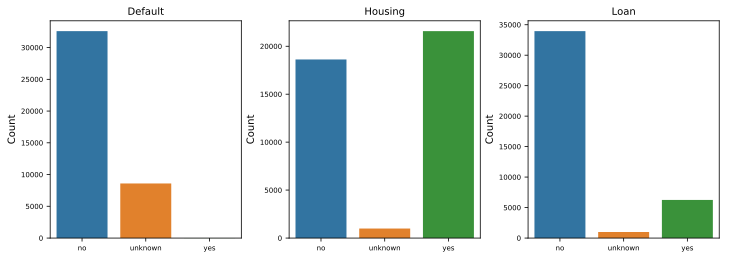

In [155]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=7)
#plt.savefig('housing_count_distribuition.png', format='png', dpi =300)
plt.subplots_adjust(wspace=0.25)

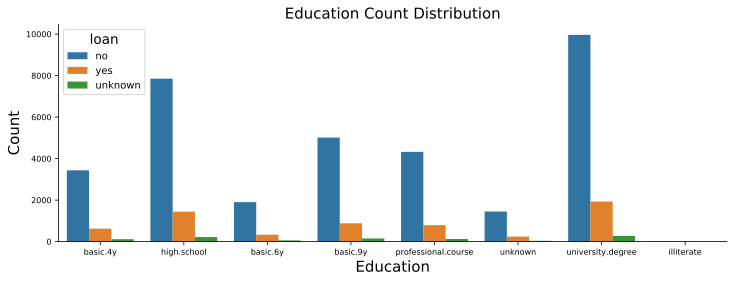

In [156]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
sns.countplot(x = 'education', hue = 'loan', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
#plt.savefig('education_count_distribuition_loan.png', format='png', dpi =300)
sns.despine()

#### Tratamento com os dados Categoricos

In [24]:
#Transformações de dados categoricos para valores numericos
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'] )

In [25]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


# 2. Related with the last contact of the current campaign


In [26]:
#Particionando o Dataset para trabalhar apenas com 'Related with the last contact of the current campaign'
bank_related = db.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [27]:
#Visualizando as amostras do dataset
print("Contact: ", bank_related.contact.unique())
print()
print("Month : ", bank_related.month.unique())
print()
print("Day of week: ", bank_related.day_of_week.unique())
print()
print("Duration: ", bank_related.duration.unique())
print()


Contact:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Day of week:  ['mon' 'tue' 'wed' 'thu' 'fri']

Duration:  [ 261  149  226 ... 1246 1556 1868]



In [28]:
# Distribuição Contatos, mes e dias da semana

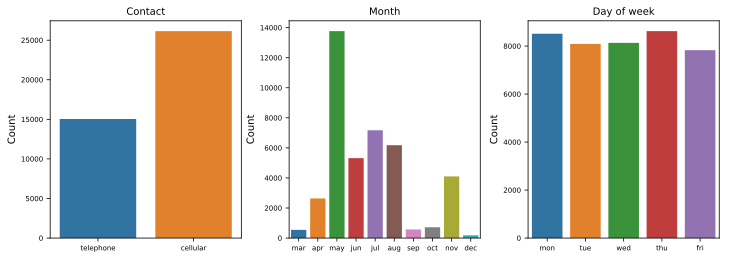

In [29]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

sns.countplot(x = 'contact', data = bank_related, ax = ax1, order = ['telephone', 'cellular'])
ax1.set_title('Contact', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'month', data = bank_related, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec']
)
ax2.set_title('Month', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'day_of_week', data = bank_related, ax = ax3, order = ['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_title('Day of week', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=7)

plt.subplots_adjust(wspace=0.25)

#['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']


##### Distribuição duração vs ocorrência

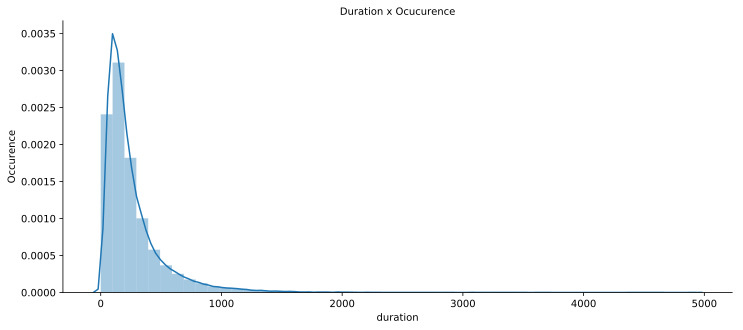

In [30]:

fig, ax2 = plt.subplots()
fig.set_size_inches(12, 5)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)
sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)



In [31]:
# As ligações que tiverem o tempo de duração da ligação zero automaticamente o target será 'no', assim devemos excluir essas linhas
db[(db['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


#### Tratamento com os dados Categoricos

In [32]:
#Transformações de dados categoricos para valores numericos
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])


bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


# 3. Social and economic context attributes

In [33]:
#Particionando o Dataset para trabalhar apenas com 'Social and Economic context attibutes'
bank_se = db.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# 4. Other attributes

In [34]:
bank_o = db.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [35]:
#Visualizando as amostras do dataset
print("Contact: ", bank_o.poutcome.unique())
print()

Contact:  ['nonexistent' 'failure' 'success']



##### Tratamento com dados categoricos

In [36]:
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])
#bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


# Validação dos dados 

In [37]:
#Montado o dataset pre-processado
db_pronto= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
db_pronto = db_pronto[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
#Criando Target
y = pd.get_dummies(db['y'], columns = ['y'], prefix = ['y'], drop_first = True)

#Excluindo linhas no qual o tempo de ligação é 0
db_pronto = db_pronto.drop([6251,23031,28063, 33015], axis=0)
y = y.drop([6251,23031,28063, 33015], axis = 0)

#Confirmando exclusão
print(db_pronto.loc[db_pronto['duration'] == 0])

print(db_pronto.shape)
print(y.shape)


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, campaign, pdays, previous, poutcome]
Index: []
(41184, 20)
(41184, 1)


# Treinamento do modelo

In [38]:
y_array = np.array(y)

#transformando em um vetor 1D
y_array = y_array.reshape(-1)
#y_array = y_array.flatten()

y_array.shape

(41184,)

In [39]:
#Bibliotecas para validação dos modelos
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10)
cross_val_score(model, dataset, y, cv=kfold, scoring='accuracy')

## 1. KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN

###### Escolhendo K vizinhos para o modelo

k=1 87.65 
k=2 89.21 
k=3 89.20 
k=4 89.74 
k=5 89.83 
k=6 90.06 
k=7 90.17 
k=8 90.26 
k=9 90.32 
k=10 90.40 
k=11 90.60 
k=12 90.60 
k=13 90.73 
k=14 90.74 
k=15 90.81 
k=16 90.78 
k=17 90.76 
k=18 90.64 
k=19 90.78 
k=20 90.62 
k=21 90.70 
k=22 90.66 
k=23 90.82 
k=24 90.70 
k=25 90.83 
Número ótimo de vizinhos é  24 com 90.8%


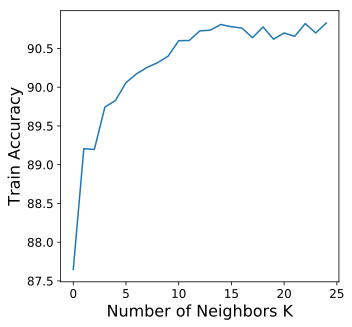

In [41]:
neighbors = np.arange(0,25)

#Lista vazia para guardar os resultados
cv_scores = []

#Interação para poder decidir quando vizinhos usar no KNN com 10-fold
for k in neighbors:
    k_value = k+1
    knn = KNN(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = KFold(n_splits=10)
    scores = cross_val_score(knn, db_pronto, y_array, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f " % (k_value, scores.mean()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Número ótimo de vizinhos é  %d com %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [42]:
#Uma vez escolhido k vizinhos vamos validar o modelo com os k vizinhos
knn = KNN(n_neighbors = 24, weights='uniform', p=2, metric='euclidean')
scores = cross_validate(estimator=knn, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [43]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores = pd.DataFrame(scores)
scores.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.403118,0.906623,0.968439,0.911480,0.413043,0.687556,0.333333,0.504198,0.368932,0.581772
1,0.402588,1.012970,0.964069,0.912424,0.469388,0.690920,0.158621,0.502781,0.237113,0.582024
2,0.389101,0.870939,0.960185,0.912856,0.531646,0.692764,0.482759,0.497313,0.506024,0.578989
3,0.383790,0.875952,0.943433,0.914556,0.604167,0.689994,0.424908,0.498970,0.498925,0.579136
4,0.384421,0.897304,0.946090,0.913991,0.611465,0.690105,0.373541,0.494867,0.463768,0.576402
5,0.388032,0.972338,0.951190,0.914207,0.611111,0.690058,0.293333,0.507814,0.396396,0.585073
6,0.384527,0.893868,0.899223,0.919009,0.518182,0.686221,0.136038,0.532101,0.215501,0.599413
7,0.383932,0.779505,0.889995,0.919981,0.564516,0.684704,0.354970,0.527851,0.435866,0.596133
8,0.387083,0.811046,0.856241,0.922085,0.609375,0.690083,0.240741,0.502004,0.345133,0.581206
9,0.411566,0.613755,0.691112,0.935601,0.688794,0.625434,0.597780,0.327511,0.640068,0.429902


In [44]:
print("Média Acurácia", round(scores['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores['test_precision'].mean(), 3))
print("Média Recall", round(scores['test_recall'].mean(), 3))
print("Média Recall", round(scores['test_f1'].mean(), 3))

Média Acurácia 0.907
Média Precisão 0.562
Média Recall 0.34
Média Recall 0.411


## 2. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
dtree = DecisionTreeClassifier(criterion='gini') #ou Gini
scores_1 = cross_validate(estimator=dtree, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [48]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_1 = pd.DataFrame(scores_1)
scores_1.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.159429,0.003906,0.952173,1.0,0.251497,1.0,0.368421,1.0,0.298932,1.0
1,0.126045,0.003781,0.948774,1.0,0.288462,1.0,0.310345,1.0,0.299003,1.0
2,0.127728,0.003899,0.935907,1.0,0.309322,1.0,0.419540,1.0,0.356098,1.0
3,0.129767,0.004339,0.921826,1.0,0.416949,1.0,0.450549,1.0,0.433099,1.0
4,0.127758,0.003892,0.935891,1.0,0.487544,1.0,0.533074,1.0,0.509294,1.0
5,0.127614,0.003816,0.926663,1.0,0.315789,1.0,0.293333,1.0,0.304147,1.0
6,0.125843,0.005877,0.854298,1.0,0.314168,1.0,0.365155,1.0,0.337748,1.0
7,0.139036,0.004068,0.858426,1.0,0.392344,1.0,0.332657,1.0,0.360044,1.0
8,0.119506,0.004822,0.787518,1.0,0.356511,1.0,0.435185,1.0,0.391939,1.0
9,0.118386,0.004749,0.588150,1.0,0.561404,1.0,0.473573,1.0,0.513761,1.0


In [49]:
print("Média Acurácia", round(scores_1['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_1['test_precision'].mean(), 3))
print("Média Recall", round(scores_1['test_recall'].mean(), 3))
print("Média Recall", round(scores_1['test_f1'].mean(), 3))

Média Acurácia 0.871
Média Precisão 0.369
Média Recall 0.398
Média Recall 0.38


### 3. Artificial Neural Networks

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
scores_2_list = []
for i in range(1,56):
    scores_2_tmp = []
    ANN = MLPClassifier(hidden_layer_sizes=(i))
    scores_2_pre = cross_validate(estimator=ANN, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
    scores_2_tmp.append(scores_2_pre['fit_time'].mean())
    scores_2_tmp.append(scores_2_pre['score_time'].mean())
    scores_2_tmp.append(scores_2_pre['test_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['train_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['test_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['train_precision'].mean())
    scores_2_tmp.append(scores_2_pre['test_recall'].mean())
    scores_2_tmp.append(scores_2_pre['train_recall'].mean())
    scores_2_tmp.append(scores_2_pre['test_f1'].mean())
    scores_2_tmp.append(scores_2_pre['train_f1'].mean())
    scores_2_list.extend(scores_2_tmp)


In [54]:
#Para cada hidden layer temos as métricas médias proveniente do K-fold CV
scores_2_list = np.array(scores_2_list)
scores_2_list = scores_2_list.reshape(55,10)
scores_2_list
scores_2_list = pd.DataFrame(scores_2_list)
scores_2_list.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]
scores_2_list

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.275063,0.003631,0.889003,0.895310,0.889003,0.237695,0.190352,0.222002,0.199446,0.229228
1,1.585130,0.003688,0.896337,0.896281,0.896337,0.351365,0.211065,0.298256,0.238613,0.311862
2,0.843564,0.003703,0.896653,0.896470,0.896653,0.372736,0.153606,0.249118,0.208205,0.287654
3,1.155651,0.004100,0.886357,0.900142,0.886357,0.436668,0.267163,0.311288,0.273540,0.350633
4,1.169231,0.003710,0.889853,0.896454,0.889853,0.548330,0.087622,0.156318,0.133036,0.234961
5,0.941040,0.004437,0.899154,0.898677,0.899154,0.622308,0.310545,0.402554,0.350571,0.453534
6,0.637162,0.003898,0.905419,0.903841,0.905419,0.568668,0.326420,0.367760,0.369612,0.438825
7,0.943007,0.004277,0.886624,0.898232,0.886624,0.588143,0.193107,0.305906,0.223145,0.339724
8,0.661590,0.004194,0.892282,0.902632,0.892282,0.629466,0.250073,0.343873,0.304735,0.422497
9,0.695536,0.004814,0.901485,0.895456,0.901485,0.637410,0.249781,0.338691,0.283846,0.365252


In [88]:
#Maior acurácia
scores_2_list[scores_2_list['test_accuracy']==scores_2_list['test_accuracy'].max()]
#Número de hiiden layers = 7

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.905419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#Selecionando valores das metricas na qual o modelo se saiu melhor na acuracia para k hidden layers
scores_2 = scores_2_list.loc[6]
scores_2 = np.array(scores_2)
scores_2

array([0.63716171, 0.00389802, 0.90541934, 0.90384066, 0.90541934,
       0.5686683 , 0.32641953, 0.36776   , 0.36961229, 0.43882498])

## 4. Linear Discriminant Analysis (LDA)

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [93]:
LDA = LinearDiscriminantAnalysis()
scores_3 = cross_validate(estimator=LDA, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [94]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_3 = pd.DataFrame(scores_3)
scores_3.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.029669,0.003286,0.969410,0.903062,0.450000,0.635257,0.473684,0.484092,0.461538,0.549467
1,0.030373,0.003006,0.966011,0.902846,0.530864,0.629866,0.296552,0.482314,0.380531,0.546302
2,0.023714,0.002990,0.961884,0.903224,0.610390,0.628999,0.270115,0.479848,0.374502,0.544392
3,0.022992,0.003042,0.940762,0.905194,0.605839,0.626671,0.304029,0.483169,0.404878,0.545643
4,0.025254,0.003022,0.946819,0.904630,0.663793,0.625296,0.299611,0.482774,0.412869,0.544869
5,0.022545,0.002980,0.948033,0.905115,0.564706,0.629919,0.213333,0.493092,0.309677,0.553170
6,0.022526,0.003104,0.894366,0.910106,0.454545,0.629933,0.190931,0.510543,0.268908,0.563988
7,0.022296,0.003106,0.886595,0.910646,0.535714,0.624071,0.395538,0.506390,0.455076,0.559105
8,0.022190,0.003302,0.855270,0.914315,0.569892,0.628625,0.327160,0.499499,0.415686,0.556672
9,0.022006,0.003642,0.661000,0.930448,0.695276,0.539388,0.466702,0.423581,0.558507,0.474521


In [95]:
print("Média Acurácia", round(scores_3['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_3['test_precision'].mean(), 3))
print("Média Recall", round(scores_3['test_recall'].mean(), 3))
print("Média Recall", round(scores_3['test_f1'].mean(), 3))

Média Acurácia 0.903
Média Precisão 0.568
Média Recall 0.324
Média Recall 0.404


## 5. Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logmodel = LogisticRegression() 
scores_4 = cross_validate(estimator=logmodel, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [98]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_4 = pd.DataFrame(scores_4)
scores_4.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.202834,0.003042,0.971352,0.903278,0.477778,0.669917,0.377193,0.409854,0.421569,0.508568
1,0.237127,0.003003,0.965768,0.903575,0.533333,0.668620,0.220690,0.406229,0.312195,0.505397
2,0.371303,0.004971,0.960913,0.904519,0.606557,0.671223,0.212644,0.406852,0.314894,0.506622
3,0.289116,0.003071,0.936635,0.907028,0.573171,0.674896,0.172161,0.406916,0.264789,0.507714
4,0.273188,0.003197,0.945119,0.905736,0.659794,0.670896,0.249027,0.398129,0.361582,0.499714
5,0.336658,0.003043,0.948276,0.904845,0.593750,0.660637,0.168889,0.413590,0.262976,0.508706
6,0.280794,0.006703,0.897280,0.911671,0.486842,0.676219,0.176611,0.430467,0.259194,0.526057
7,0.309633,0.003235,0.892424,0.912022,0.573099,0.672642,0.397566,0.416204,0.469461,0.514226
8,0.187247,0.003280,0.860855,0.914504,0.625418,0.663488,0.288580,0.418337,0.394931,0.513136
9,0.257262,0.003611,0.629189,0.931366,0.748299,0.585859,0.290698,0.253275,0.418729,0.353659


In [99]:
print("Média Acurácia", round(scores_4['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_4['test_precision'].mean(), 3))
print("Média Recall", round(scores_4['test_recall'].mean(), 3))
print("Média Recall", round(scores_4['test_f1'].mean(), 3))

Média Acurácia 0.901
Média Precisão 0.588
Média Recall 0.255
Média Recall 0.348


## 6. Support Vector Machine (SVM)

In [100]:
from sklearn.svm import LinearSVC

In [101]:
SVM = LinearSVC()
scores_5 = cross_validate(estimator=SVM, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

In [102]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_5 = pd.DataFrame(scores_5)
scores_5.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,4.833777,0.003089,0.959942,0.902631,0.367876,0.613800,0.622807,0.546399,0.462541,0.578141
1,4.584919,0.003012,0.965526,0.900553,0.523077,0.661220,0.234483,0.369077,0.323810,0.473729
2,4.563125,0.003019,0.961156,0.892810,0.675000,0.724295,0.155172,0.178236,0.252336,0.286074
3,4.580490,0.003068,0.935178,0.892108,0.800000,0.769795,0.029304,0.120220,0.056537,0.207962
4,4.572301,0.003141,0.947547,0.902309,0.637584,0.607871,0.369650,0.489847,0.467980,0.542514
5,5.377534,0.004593,0.948519,0.901851,0.580247,0.641016,0.208889,0.400000,0.307190,0.492608
6,6.107557,0.003469,0.101748,0.118437,0.101748,0.114400,1.000000,1.000000,0.184704,0.205312
7,5.265692,0.003423,0.811316,0.888631,0.358000,0.501481,0.726166,0.775500,0.479571,0.609091
8,6.779123,0.003375,0.855027,0.911806,0.596226,0.667594,0.243827,0.360721,0.346112,0.468369
9,8.822545,0.003500,0.477902,0.549317,0.468053,0.139559,0.998943,0.983261,0.637437,0.244425


In [103]:
print("Média Acurácia", round(scores_5['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_5['test_precision'].mean(), 3))
print("Média Recall", round(scores_5['test_recall'].mean(), 3))
print("Média Recall", round(scores_5['test_f1'].mean(), 3))

Média Acurácia 0.796
Média Precisão 0.511
Média Recall 0.459
Média Recall 0.352


In [107]:
scores['test_accuracy'].mean()
scores_1['test_accuracy'].mean()
scores_3['test_accuracy'].mean()
scores_4['test_accuracy'].mean()
scores_5['test_accuracy'].mean()
scores_2[2]

0.9054193357144145

In [171]:
#Comparação dos modelos - Acurácia
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_accuracy'].mean(), scores_1['test_accuracy'].mean(), scores_2[2], scores_3['test_accuracy'].mean(), scores_4['test_accuracy'].mean(), scores_5['test_accuracy'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
0,K-Near Neighbors,0.906998
2,Artificial Neural Networks,0.905419
3,Linear Discriminant Analysis (LDA),0.903015
4,Logistic Regression,0.900781
1,Decision Tree,0.870963
5,Support Vector Machine,0.796386


In [162]:
#Comparação dos modelos - Recall
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_recall'].mean(), scores_1['test_recall'].mean(), scores_2[6], scores_3['test_recall'].mean(), scores_4['test_recall'].mean(), scores_5['test_recall'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
5,Support Vector Machine,0.458924
1,Decision Tree,0.398183
0,K-Near Neighbors,0.339602
2,Artificial Neural Networks,0.326420
3,Linear Discriminant Analysis (LDA),0.323766
4,Logistic Regression,0.255406


In [172]:
modelos2 = np.array(modelos)

modelos2[:,1]

array([0.9069976657291617, 0.8709626352770498, 0.9054193357144145,
       0.9030151027806677, 0.9007810910974043, 0.7963860660172875],
      dtype=object)

In [186]:
import plotly
plotly.__version__

import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt

plt.bar(range(5), modelos2[:,1], width, color="blue")


fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig, filename='mpl-basic-bar')

ModuleNotFoundError: No module named 'plotly'

# Resultados e Metricas 

# Discussões

# Referências

http://deeplizard.com/learn/video/FK77zZxaBoI